In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")

# Solution to Exercise 4a: Traveltime in two dimensions (Nov. 25, 2021)
---

Assume straight ray paths between transmitter and receiver on a two-dimensional
model space. The travel time $t$ of the $q$-th ray path can be expressed as:

$$ t_q = \int_{L_q} \frac{1}{v(l)} dl \approx \sum_i s_i l_i, $$

where $v$ is the velocity and $L_q$ the total travel path of this ray, $l_i$
are the individual ray paths in each cell, and $s_i$ are the discrete and
piecewise constant slowness values. To do a forward computation, the travel
times through each discrete cell can be determined geometrically and formulated
in matrix notation as:

$$ \mathbf{t} = \mathbf{G} \mathbf{s}. $$

Here, the cumulated travel times of all rays form the vector $\mathbf{t}$, the
slowness values of all cells are located in $\mathbf{s}$ and the ray paths of every
ray form the matrix $\mathbf{G}$.  The matrix $\mathbf{G}$ contains one row per ray and
one column per model cell. Accordingly, measured travel times $\mathbf{t}$ are
associated with the data vector $\mathbf{d}$, and slowness values $\mathbf{s}$ are
associated with the model parameters $\mathbf{m}$. The corresponding geometry is displayed in the figure below.

<img src="http://www2.geo.uni-bonn.de/~wagner/2dsimple.png" style="width:40%">

*[Figure](http://www2.geo.uni-bonn.de/~wagner/2dsimple.png): Measurement setup of a simple travel time tomography measurement. Green lines indicate ray paths of the individual measurements (with the label dX being the $X^{th}$ measurement, located at the end of the path). Parameter numbers are given in the lower-right corner of each cell (zero indexed).* 

### a) What type of inverse problem is presented here?

**Solution**: It's a mixed-determined problem, as there are parts of the model domain which, are overdetermined (lower right cell slightly), while others are underdetermined.

### b) Formulate the forward operator $\mathbf{G}$ for all measurements and for the first 5 measurements (d0 - d4)
 
Check if your result is correct, by computing the traveltimes for the model
``` python
m = np.array([5, 1,  1,  1,  5,  1,  5,  1,  5,  1,  1, 1,  5,  1,  1,  1,  5,  1, 5,  1,  5,  1,  1,  1,  5])
```

The calculated traveltimes should be `d = [7.07106781, 2.82842712,  13, 13, 9, 35.35533906, 13, 9, 13]`.

If you want to check out your forward operator visually, the Matplotlib functions [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) or [matshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html?highlight=matshow#matplotlib.pyplot.matshow) can be of help.

In [2]:
# formulate G with 9 measurements and 25 model parameters (b)
Gf = np.zeros((9, 25))

a = 1 # horizontal distance through cell
b = np.sqrt(2) # diagonal distance through cell

Gf[0, 4] = b
Gf[1, 3] = b
Gf[1, 9] = b
Gf[2, 5:10] = a
Gf[3, 20:25] = a
Gf[4, np.arange(2,23,5)] = a
Gf[5, np.arange(0,25,6)] = b
Gf[6, 15:20] = a
Gf[7, 10:15] = a
Gf[8, 0:5] = a

# small G (first five measurements, task a)
Gs = Gf[:5]

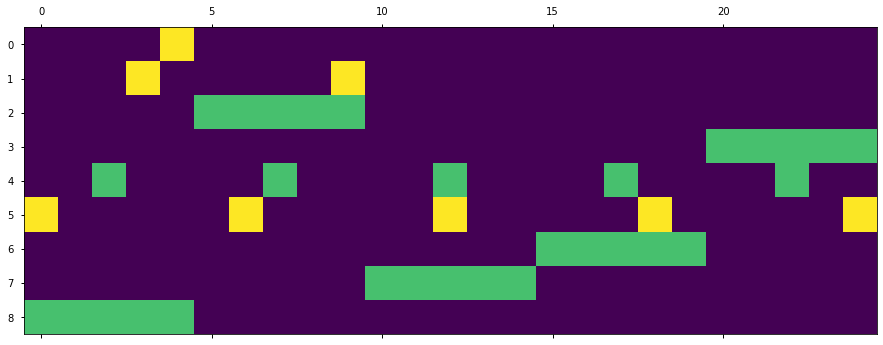

In [3]:
plt.matshow(Gf)

Check if your result is correct, by computing the traveltimes for the model:

In [4]:
m = [5, 1,  1,  1,  5,  1,  5,  1,  5,  1,  1, 1,  5,  1,  1,  1,  5,  1, 5,  1,  5,  1,  1,  1,  5]

The calculated traveltimes should be:

In [5]:
d = [7.07106781, 2.82842712,  13, 13, 9, 35.35533906, 13, 9, 13]

There are various ways of comparing arrays with each other. You can calculate the differences manually, or use in-built Numpy functions such as [allclose](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html), or a whole range of [testing](https://numpy.org/doc/stable/reference/routines.testing.html?highlight=testing#module-numpy.testing) functions.

In [6]:
d2 = Gf @ m
np.allclose(d, d2)

True